In [1]:
from utils import *
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
x_min = -1
x_max = 1
y_min = -1
y_max = 1
divide = 100

In [3]:
def exact_solution(x, y, i):
    # there is a positive charge at (2,0), and a negative charge at (-2,0)
    #  then the potential is given by
    k = 1
    q = 1
    # if x == 0 and y == 0:
    #     potential = 1e6
    # else:
    if i == 1:
        potential = k * q / np.sqrt((x-2)**2 + y**2)
    elif i == 2:
        potential = -k * q / np.sqrt((x+2)**2 + y**2) + k * q / np.sqrt((x-2)**2 + y**2)
    elif i == 4:
        potential = -k * q / np.sqrt((x+2)**2 + y**2) + k * q / np.sqrt((x-2)**2 + y**2) + k * q / np.sqrt(x**2 + (y-2)**2) - k * q / np.sqrt(x**2 + (y+2)**2)
    return potential

def numerical_solution(x,y, Z_exact, i):
    x_index = int((x - x_min) / (x_max - x_min) * divide)
    y_index = int((y - y_min) / (y_max - y_min) * divide)
    if x_index >= divide or y_index >= divide:
        return exact_solution(x, y, i)
    return Z_exact[x_index, y_index]

def vector_field(x, y, i):
    x_step = (x_max - x_min) / divide
    y_step = (y_max - y_min) / divide
    u = -exact_solution(x+x_step, y, i) / x_step + exact_solution(x, y, i) / x_step
    v = -exact_solution(x, y+y_step, i) / y_step + exact_solution(x, y, i) / y_step
    return u, v

def numerical_vector_field(x, y, Z_exact, i):
    x_step = (x_max - x_min) / divide
    y_step = (y_max - y_min) / divide
    u = -numerical_solution(x+x_step, y, Z_exact, i) / x_step + numerical_solution(x, y, Z_exact, i) / x_step
    v = -numerical_solution(x, y+y_step, Z_exact, i) / y_step + numerical_solution(x, y, Z_exact, i) / y_step
    return u, v



In [4]:
# # plot the exact solution with hot
# x_grid = np.linspace(x_min, x_max, divide)
# y_grid = np.linspace(y_min, y_max, divide)
# X, Y = np.meshgrid(x_grid, y_grid)
# Z = np.zeros((len(x_grid), len(y_grid)))
# for i in range(len(x_grid)):
#     for j in range(len(y_grid)):
#         Z[j, i] = (exact_solution(x_grid[i], y_grid[j]))

# u_grid = np.linspace(x_min, x_max, 20)
# v_grid = np.linspace(y_min, y_max, 20)
# U, V = np.meshgrid(u_grid, v_grid)
# for i in range(len(u_grid)):
#     for j in range(len(v_grid)):
#         U[j, i], V[j, i] = vector_field(u_grid[i], v_grid[j])
# U_tmp, V_tmp = np.meshgrid(u_grid, v_grid)
# cmap = mpl.cm.coolwarm
# fig, axes = plt.subplots(1, 1)
# # 第一个子图中不画出colorbar.
# im = axes.pcolormesh(X, Y, Z, cmap=cmap, shading='nearest')
# cbar = fig.colorbar(im, ax=axes)
# plt.quiver(U_tmp, V_tmp, U, V, color='#414141',linewidth=1, scale=43)
# plt.title('Exact solution')
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

In [5]:
N = divide
h = (x_max - x_min)/ (N-1)
A = np.zeros((N ** 2, N ** 2))
tmp = np.zeros((N, N))
for i in range(N):
    tmp[i, i] = 4
    if i != 0:
        tmp[i, i - 1] = -1
    if i != N - 1:
        tmp[i, i + 1] = -1
for i in range(N):
    A[i * N:(i + 1) * N, i * N:(i + 1) * N] = tmp
    if i != 0:
        A[i * N:(i + 1) * N, (i - 1) * N:i * N] = -np.identity(N)
    if i != N - 1:
        A[i * N:(i + 1) * N, (i + 1) * N:(i + 2) * N] = -np.identity(N)

b_1 = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + (i) * h
        tmp_y = y_min + (j) * h
        # b_1[i * N + j] = 0 #((1 - (tmp_x ** 2)) * np.exp(-tmp_x ** 2 / 2) + (1 - (tmp_y ** 2)) * np.exp(-tmp_y ** 2 / 2)) * (h ** 2)
        if i == 0:
            b_1[i * N + j] += exact_solution(x_min-h, tmp_y, 1)
        if i == (N-1):
            b_1[i * N + j] += exact_solution(x_max+h, tmp_y, 1)
        if j == 0:
            b_1[i * N + j] += exact_solution(tmp_x, y_min-h, 1)
        if j == (N-1):
            b_1[i * N + j] += exact_solution(tmp_x, y_max+h, 1)

x_1 = np.linalg.solve(A, b_1)
exact_solution_ref = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + (i) * h
        tmp_y = y_min + (j) * h
        exact_solution_ref[i * N + j] = exact_solution(tmp_x, tmp_y, 1)

# absolute error
print("when N =", N)
print("absolute error = ", np.linalg.norm(x_1 - exact_solution_ref))
# relative error
print("relative error = ", np.linalg.norm(x_1 - exact_solution_ref) / np.linalg.norm(exact_solution_ref))

when N = 100
absolute error =  2.8911747347324432
relative error =  0.053301467253741616


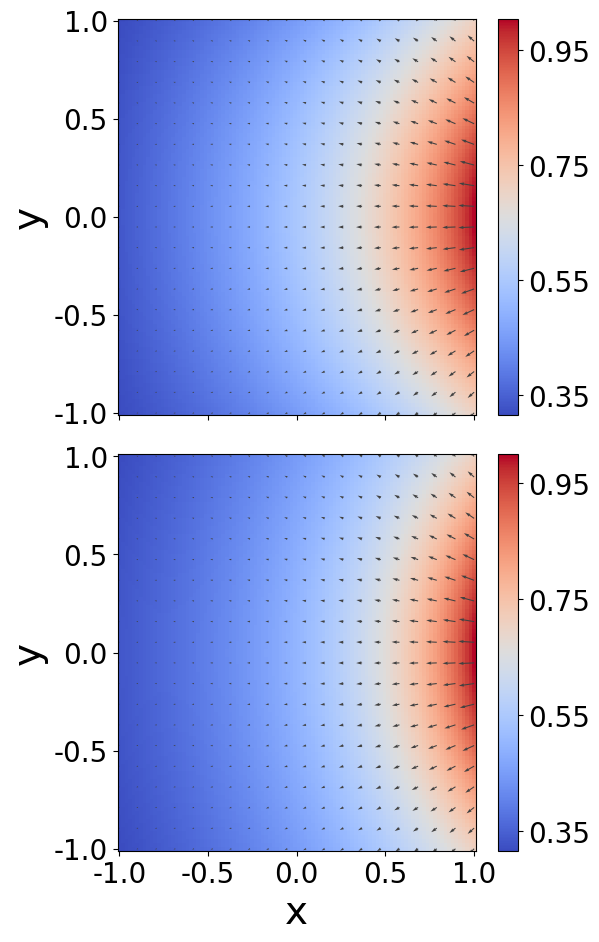

In [9]:
# plot the numerical solution with hot
x_grid = np.linspace(x_min, x_max, N)
y_grid = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x_grid, y_grid)
Z = x_1.reshape(N, N).T
Z_exact = np.zeros((len(x_grid), len(y_grid)))
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        Z_exact[j, i] = (exact_solution(x_grid[i], y_grid[j], 1))

cmap = mpl.cm.coolwarm
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(6.4,11.4))
axes1 = axes[0]
im1 = axes1.pcolormesh(X, Y, Z, cmap=cmap, shading='nearest')
u_grid_numerical = np.linspace(x_min, x_max, 20)
v_grid_numerical = np.linspace(y_min, y_max, 20)
U_numerical, V_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
for i in range(len(u_grid_numerical)):
    for j in range(len(v_grid_numerical)):
        U_numerical[j, i], V_numerical[j, i] = numerical_vector_field(u_grid_numerical[i], v_grid_numerical[j], Z_exact.T, 1)
U_tmp_numerical, V_tmp_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
#axes1.colorbar()
cb1 = plt.colorbar(im1, ax=axes1)
cb1.set_ticks([0.35,0.55,0.75,0.95])
cb1.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。

axes1.quiver(U_tmp_numerical, V_tmp_numerical, U_numerical, V_numerical, color='#414141',linewidth=1, scale=23)
#axes1.title('Numerical solution')
axes1.set_ylabel('y', fontsize=28)
axes1.set_xticks(np.linspace(-1, 1, 5))
axes1.set_yticks(np.linspace(-1, 1, 5))
axes1.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes1.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)


axes2 = axes[1]
im2 = axes2.pcolormesh(X, Y, Z_exact, cmap=cmap, shading='nearest')
u_grid = np.linspace(x_min, x_max, 20)
v_grid = np.linspace(y_min, y_max, 20)
U, V = np.meshgrid(u_grid, v_grid)
for i in range(len(u_grid)):
    for j in range(len(v_grid)):
        U[j, i], V[j, i] = vector_field(u_grid[i], v_grid[j], 1)
U_tmp, V_tmp = np.meshgrid(u_grid, v_grid)
#axes2.colorbar()
cb2 = plt.colorbar(im2, ax=axes2)
cb2.set_ticks([0.35,0.55,0.75,0.95])
cb2.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。
axes2.quiver(U_tmp, V_tmp, U, V, color='#414141',linewidth=1, scale=23)
#axes2.title('Exact solution')
axes2.set_xlabel('x', fontsize=28)
axes2.set_ylabel('y', fontsize=28)
axes2.set_xticks(np.linspace(-1, 1, 5))
axes2.set_yticks(np.linspace(-1, 1, 5))
axes2.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes2.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig('linear_equation_1.png', dpi=300, format='png',bbox_inches='tight')

In [10]:
N = divide
h = (x_max - x_min) / (N-1)
A = np.zeros((N ** 2, N ** 2))
tmp = np.zeros((N, N))
for i in range(N):
    tmp[i, i] = 4
    if i != 0:
        tmp[i, i - 1] = -1
    if i != N - 1:
        tmp[i, i + 1] = -1
for i in range(N):
    A[i * N:(i + 1) * N, i * N:(i + 1) * N] = tmp
    if i != 0:
        A[i * N:(i + 1) * N, (i - 1) * N:i * N] = -np.identity(N)
    if i != N - 1:
        A[i * N:(i + 1) * N, (i + 1) * N:(i + 2) * N] = -np.identity(N)

b_2 = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + i * h
        tmp_y = y_min + j * h
        b_2[i * N + j] = 0 #((1 - (tmp_x ** 2)) * np.exp(-tmp_x ** 2 / 2) + (1 - (tmp_y ** 2)) * np.exp(-tmp_y ** 2 / 2)) * (h ** 2)
        if i == 0:
            b_2[i * N + j] += exact_solution(x_min-h, tmp_y, 2)
        if i == (N-1):
            b_2[i * N + j] += exact_solution(x_max+h, tmp_y, 2)
        if j == 0:
            b_2[i * N + j] += exact_solution(tmp_x, y_min-h, 2)
        if j == (N-1):
            b_2[i * N + j] += exact_solution(tmp_x, y_max+h, 2)

x_2 = np.linalg.solve(A, b_2)

exact_solution_ref = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + i * h
        tmp_y = y_min + j * h
        exact_solution_ref[i * N + j] = exact_solution(tmp_x, tmp_y, 2)

print("when N = ", N)
print("absolute error = ", np.linalg.norm(x_2 - exact_solution_ref))
# relative error
print("relative error = ", np.linalg.norm(x_2 - exact_solution_ref) / np.linalg.norm(exact_solution_ref))

when N =  100
absolute error =  1.7062416213726765
relative error =  0.05699681854073012


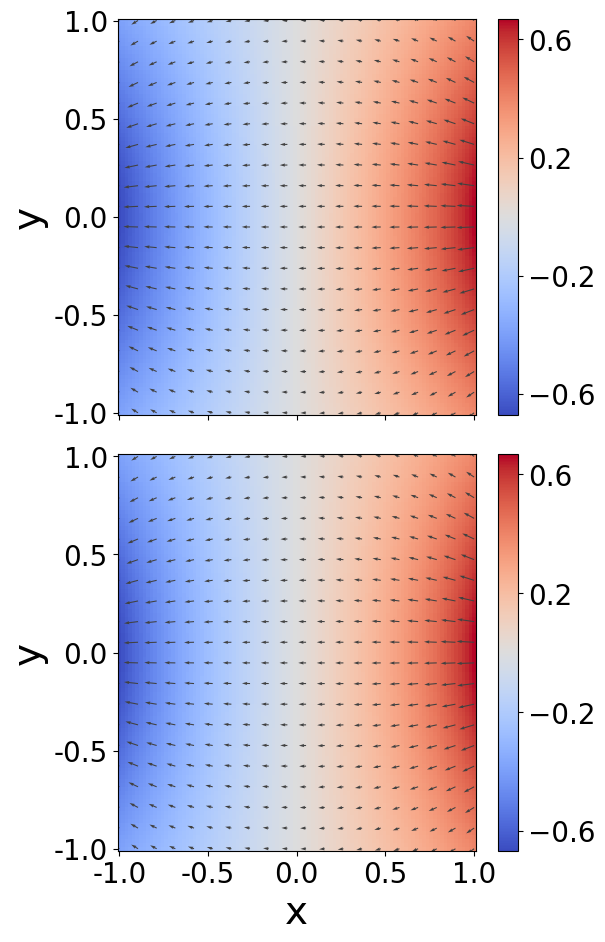

In [12]:
# plot the numerical solution with hot
x_grid = np.linspace(x_min, x_max, N)
y_grid = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x_grid, y_grid)
Z = x_2.reshape(N, N).T
Z_exact = np.zeros((len(x_grid), len(y_grid)))
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        Z_exact[j, i] = (exact_solution(x_grid[i], y_grid[j], 2))

cmap = mpl.cm.coolwarm
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(6.4,11.4))
axes1 = axes[0]
im1=axes1.pcolormesh(X, Y, Z, cmap=cmap, shading='nearest')
u_grid_numerical = np.linspace(x_min, x_max, 20)
v_grid_numerical = np.linspace(y_min, y_max, 20)
U_numerical, V_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
for i in range(len(u_grid_numerical)):
    for j in range(len(v_grid_numerical)):
        U_numerical[j, i], V_numerical[j, i] = numerical_vector_field(u_grid_numerical[i], v_grid_numerical[j], Z_exact.T, 2)
U_tmp_numerical, V_tmp_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
#axes1.colorbar()
cb1 = plt.colorbar(im1, ax=axes1)
cb1.set_ticks([-0.6,-0.2,0.2,0.6])
cb1.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。
axes1.quiver(U_tmp_numerical, V_tmp_numerical, U_numerical, V_numerical, color='#414141',linewidth=1, scale=23)
#axes1.title('Numerical solution')
axes1.set_ylabel('y', fontsize=28)
axes1.set_xticks(np.linspace(-1, 1, 5))
axes1.set_yticks(np.linspace(-1, 1, 5))
axes1.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes1.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)


axes2 = axes[1]
im2=axes2.pcolormesh(X, Y, Z_exact, cmap=cmap, shading='nearest')
u_grid = np.linspace(x_min, x_max, 20)
v_grid = np.linspace(y_min, y_max, 20)
U, V = np.meshgrid(u_grid, v_grid)
for i in range(len(u_grid)):
    for j in range(len(v_grid)):
        U[j, i], V[j, i] = vector_field(u_grid[i], v_grid[j], 2)
U_tmp, V_tmp = np.meshgrid(u_grid, v_grid)
#axes2.colorbar()
cb2 = plt.colorbar(im2, ax=axes2)
cb2.set_ticks([-0.6,-0.2,0.2,0.6])
cb2.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。
axes2.quiver(U_tmp, V_tmp, U, V, color='#414141',linewidth=1, scale=23)
#axes2.title('Exact solution')
axes2.set_xlabel('x', fontsize=28)
axes2.set_ylabel('y', fontsize=28)
axes2.set_xticks(np.linspace(-1, 1, 5))
axes2.set_yticks(np.linspace(-1, 1, 5))
axes2.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes2.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig('linear_equation_2.png', dpi=300, format='png',bbox_inches='tight')

In [13]:
N = divide 
h = (x_max - x_min) / (N-1)
A = np.zeros((N ** 2, N ** 2))
tmp = np.zeros((N, N))
for i in range(N):
    tmp[i, i] = 4
    if i != 0:
        tmp[i, i - 1] = -1
    if i != N - 1:
        tmp[i, i + 1] = -1
for i in range(N):
    A[i * N:(i + 1) * N, i * N:(i + 1) * N] = tmp
    if i != 0:
        A[i * N:(i + 1) * N, (i - 1) * N:i * N] = -np.identity(N)
    if i != N - 1:
        A[i * N:(i + 1) * N, (i + 1) * N:(i + 2) * N] = -np.identity(N)

b_4 = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + i * h
        tmp_y = y_min + j * h
        b_4[i * N + j] = 0 #((1 - (tmp_x ** 2)) * np.exp(-tmp_x ** 2 / 2) + (1 - (tmp_y ** 2)) * np.exp(-tmp_y ** 2 / 2)) * (h ** 2)
        if i == 0:
            b_4[i * N + j] += exact_solution(x_min-h, tmp_y, 4)
        if i == (N-1):
            b_4[i * N + j] += exact_solution(x_max+h, tmp_y, 4)
        if j == 0:
            b_4[i * N + j] += exact_solution(tmp_x, y_min-h, 4)
        if j == (N-1):
            b_4[i * N + j] += exact_solution(tmp_x, y_max+h, 4)

x_4 = np.linalg.solve(A, b_4)

exact_solution_ref = np.zeros(N ** 2)
for i in range(N):
    for j in range(N):
        tmp_x = x_min + i * h
        tmp_y = y_min + j * h
        exact_solution_ref[i * N + j] = exact_solution(tmp_x, tmp_y, 4)

print("when N = ", N)
print("absolute error = ", np.linalg.norm(x_4 - exact_solution_ref))
# relative error
print("relative error = ", np.linalg.norm(x_4 - exact_solution_ref) / np.linalg.norm(exact_solution_ref))

when N =  100
absolute error =  2.4129900416307706
relative error =  0.05699681854073181


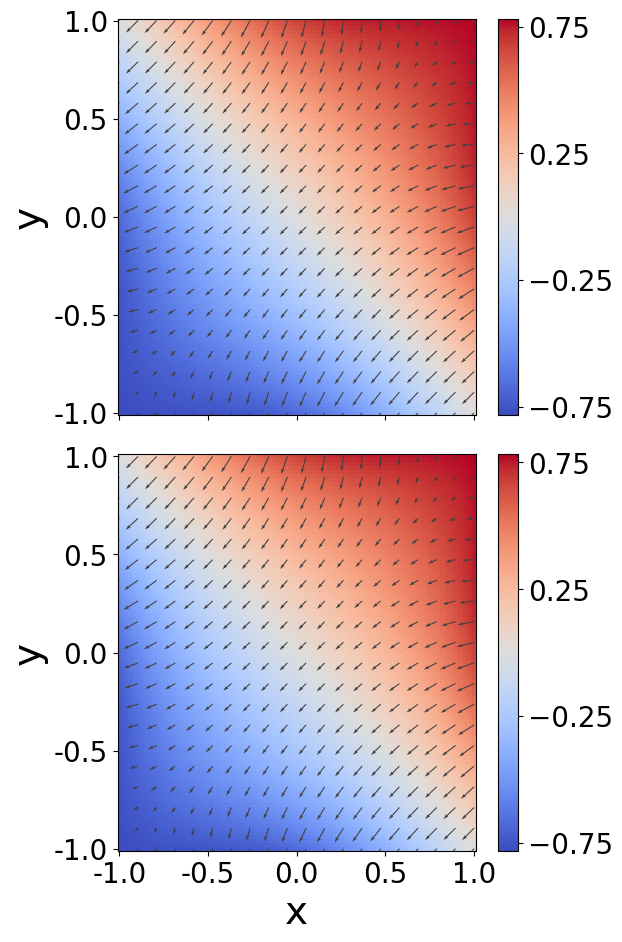

In [15]:
# plot the numerical solution with hot
x_grid = np.linspace(x_min, x_max, N)
y_grid = np.linspace(y_min, y_max, N)
X, Y = np.meshgrid(x_grid, y_grid)
Z = x_4.reshape(N, N).T
Z_exact = np.zeros((len(x_grid), len(y_grid)))
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        Z_exact[j, i] = (exact_solution(x_grid[i], y_grid[j], 4))

cmap = mpl.cm.coolwarm
fig, axes = plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(6.4,11.4))
axes1 = axes[0]
im1=axes1.pcolormesh(X, Y, Z, cmap=cmap, shading='nearest')
u_grid_numerical = np.linspace(x_min, x_max, 20)
v_grid_numerical = np.linspace(y_min, y_max, 20)
U_numerical, V_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
for i in range(len(u_grid_numerical)):
    for j in range(len(v_grid_numerical)):
        U_numerical[j, i], V_numerical[j, i] = numerical_vector_field(u_grid_numerical[i], v_grid_numerical[j], Z_exact.T, 4)
U_tmp_numerical, V_tmp_numerical = np.meshgrid(u_grid_numerical, v_grid_numerical)
#axes1.colorbar()
cb1 = plt.colorbar(im1, ax=axes1)
cb1.set_ticks([-0.75,-0.25,0.25,0.75])
cb1.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。
axes1.quiver(U_tmp_numerical, V_tmp_numerical, U_numerical, V_numerical, color='#414141',linewidth=1, scale=23)
#axes1.title('Numerical solution')
axes1.set_ylabel('y', fontsize=28)
axes1.set_xticks(np.linspace(-1, 1, 5))
axes1.set_yticks(np.linspace(-1, 1, 5))
axes1.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes1.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)


axes2 = axes[1]
im2=axes2.pcolormesh(X, Y, Z_exact, cmap=cmap, shading='nearest')
u_grid = np.linspace(x_min, x_max, 20)
v_grid = np.linspace(y_min, y_max, 20)
U, V = np.meshgrid(u_grid, v_grid)
for i in range(len(u_grid)):
    for j in range(len(v_grid)):
        U[j, i], V[j, i] = vector_field(u_grid[i], v_grid[j], 4)
U_tmp, V_tmp = np.meshgrid(u_grid, v_grid)
#axes2.colorbar()
cb2 = plt.colorbar(im2, ax=axes2)
cb2.set_ticks([-0.75,-0.25,0.25,0.75])
cb2.ax.tick_params(labelsize=20)  #设置色标刻度字体大小。
axes2.quiver(U_tmp, V_tmp, U, V, color='#414141',linewidth=1, scale=23)
#axes2.title('Exact solution')
axes2.set_xlabel('x', fontsize=28)
axes2.set_ylabel('y', fontsize=28)
axes2.set_xticks(np.linspace(-1, 1, 5))
axes2.set_yticks(np.linspace(-1, 1, 5))
axes2.set_xticklabels(np.linspace(-1, 1, 5), fontsize=20)
axes2.set_yticklabels(np.linspace(-1, 1, 5), fontsize=20)

plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(bottom=0.15, left=0.2)
plt.savefig('linear_equation_4.png',dpi=300, format='png', bbox_inches='tight')